In [1]:
import cv2
import numpy as np
import ctypes as ct
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
def loadTrainImage(path):
        img = cv2.imread(path);
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = 255 - img
        return img
    
def showImage(image,label):
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(image, cmap=plt.cm.binary)
        plt.show()

In [2]:
# img = loadTrainImage("test.jpg");
# showImage(img,"Input")


img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE);


In [4]:
img.shape

(1810, 3024)

In [22]:
def arrayToImage(array):
    return np.array(array, dtype=np.uint8)

def imageToArray(image):
    return np.asanyarray(image,dtype=np.int)

In [23]:
rows = img.shape[0]
cols = img.shape[1]

dll = ct.cdll.LoadLibrary("./thresholdingd.dll")
dll.adaptiveThreshold2.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.int, ndim=2, flags='C_CONTIGUOUS'),
    ct.c_int,
    ct.c_int
]
dll.adaptiveThreshold2.restype = np.ctypeslib.ndpointer(dtype=np.int, ndim=2, shape=(rows, cols))
img2 = dll.adaptiveThreshold2(imageToArray(img), rows, cols)
img2 = arrayToImage(img2)

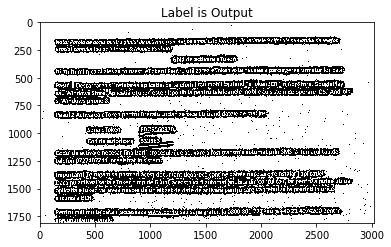

In [24]:
showImage(img2,"Output")

In [25]:
cv2.imwrite('output.png',img2)

True